<a href="https://colab.research.google.com/github/RohithParahmesh/EDA/blob/main/21BCE0525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Crime.csv")

In [20]:
df.head()

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
0,1,1,81,0.039885,0.289696,0.402062,0.472222,5.61,0.001787,2.307159,...,5.607452,5.374044,5.434246,6.014619,5.464848,5.444450,-2.433870,3.006608,3.246399,-2.303407
1,2,1,82,0.038345,0.338111,0.433005,0.506993,5.59,0.001767,2.330254,...,5.706707,5.444911,5.482013,6.039540,5.536862,5.467174,-2.449038,3.006608,3.213833,-2.272549
2,3,1,83,0.030305,0.330449,0.525703,0.479705,5.80,0.001836,2.341801,...,5.736475,5.481292,5.597310,6.084157,5.522900,5.515765,-2.464036,3.006608,3.275311,-2.517281
3,4,1,84,0.034726,0.362525,0.604706,0.520104,6.89,0.001886,2.346420,...,5.858180,5.531204,5.640985,6.129421,5.568077,5.577387,-2.478925,3.006608,3.289981,-2.544612
4,5,1,85,0.036573,0.325395,0.578723,0.497059,6.55,0.001924,2.364896,...,5.948220,5.564850,5.700042,6.195282,5.639919,5.664972,-2.497306,3.006608,3.337204,-2.372487


In [13]:
df.shape

(630, 45)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  630 non-null    int64  
 1   county    630 non-null    int64  
 2   year      630 non-null    int64  
 3   crmrte    630 non-null    float64
 4   prbarr    630 non-null    float64
 5   prbconv   630 non-null    float64
 6   prbpris   630 non-null    float64
 7   avgsen    630 non-null    float64
 8   polpc     630 non-null    float64
 9   density   630 non-null    float64
 10  taxpc     630 non-null    float64
 11  region    630 non-null    object 
 12  smsa      630 non-null    object 
 13  pctmin    630 non-null    float64
 14  wcon      630 non-null    float64
 15  wtuc      630 non-null    float64
 16  wtrd      630 non-null    float64
 17  wfir      630 non-null    float64
 18  wser      630 non-null    float64
 19  wmfg      630 non-null    float64
 20  wfed      630 non-null    float6

In [18]:
df.isnull().sum()

,0
rownames,0
county,0
year,0
crmrte,0
prbarr,0
prbconv,0
prbpris,0
avgsen,0
polpc,0
density,0


NO Null values so no requirement for imputing or anything

In [19]:
df.duplicated().sum()

0

NO Duplicated values so no need to work on removal of duplicates

Analysing categorical variables

In [22]:
df['region'].unique()

array(['central', 'west', 'other'], dtype=object)

In [23]:
df['smsa'].unique()

array(['no', 'yes'], dtype=object)

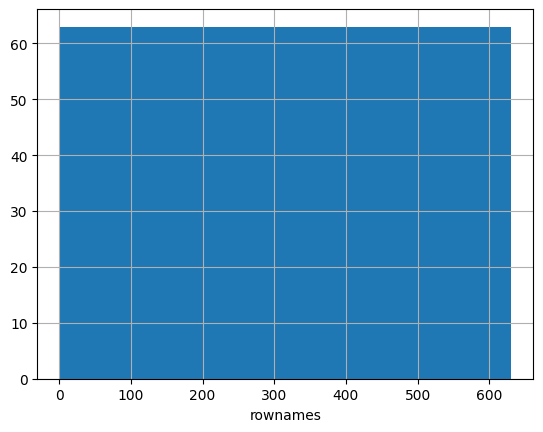

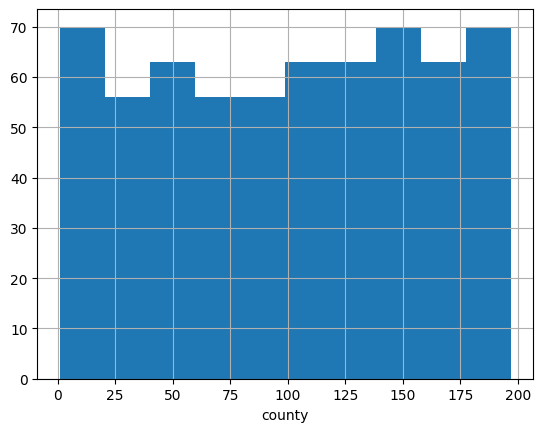

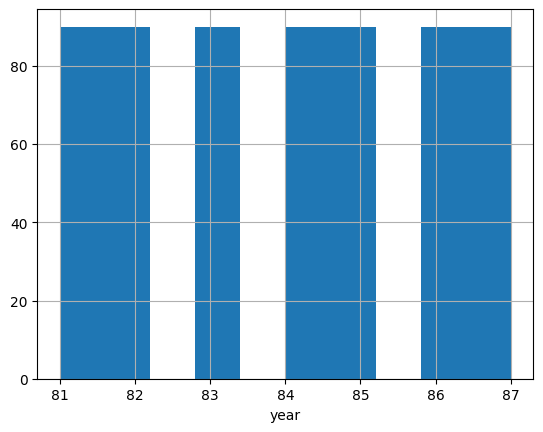

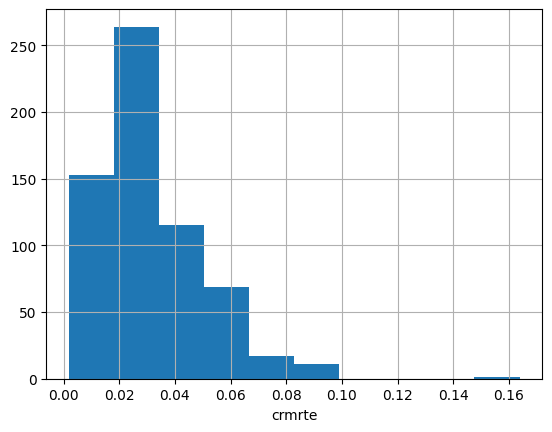

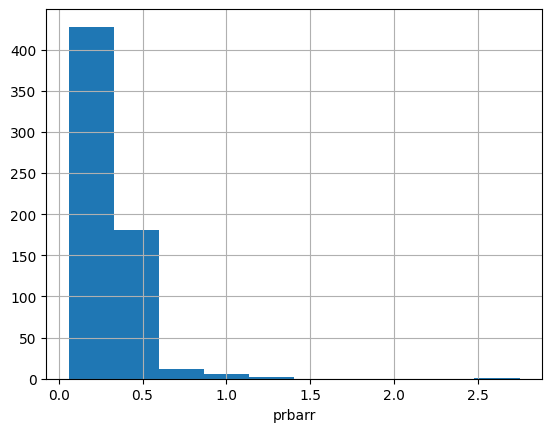

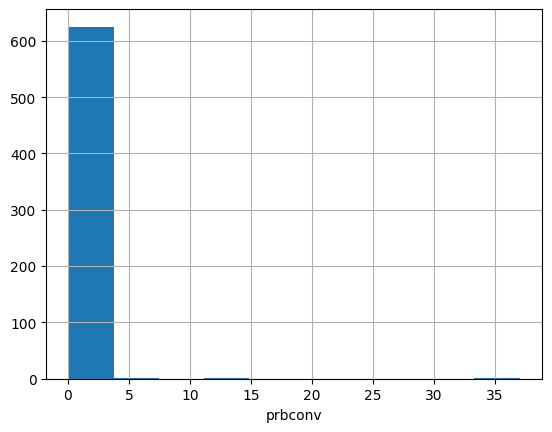

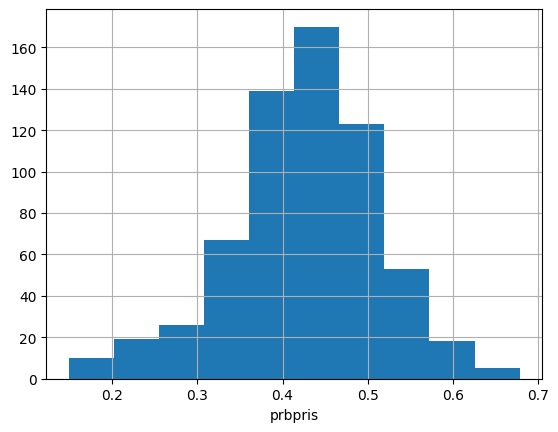

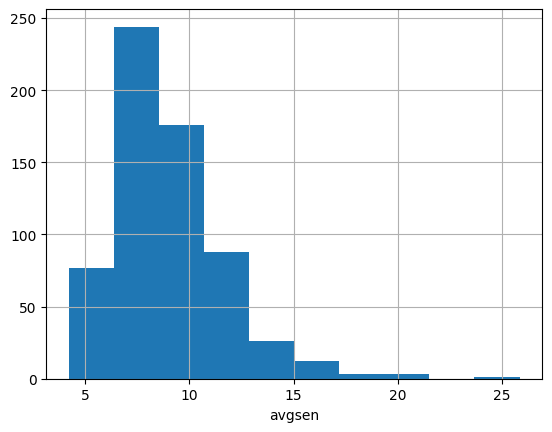

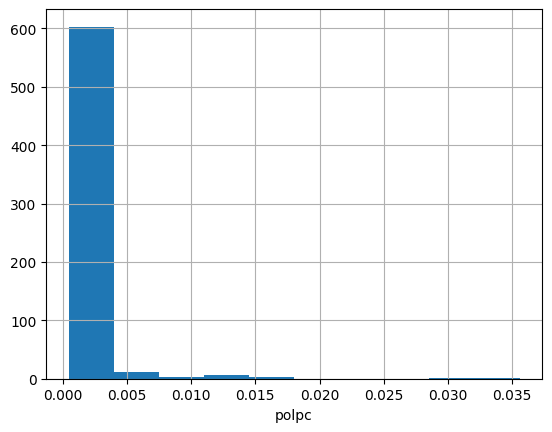

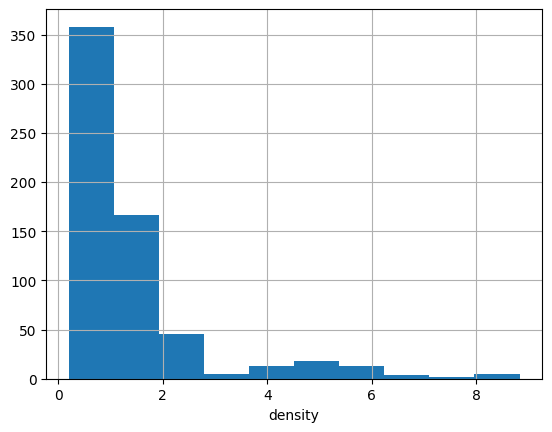

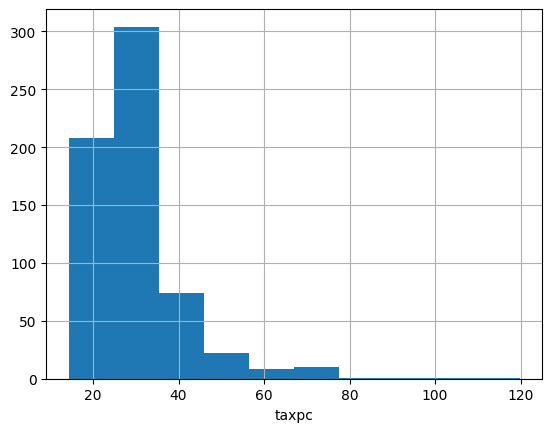

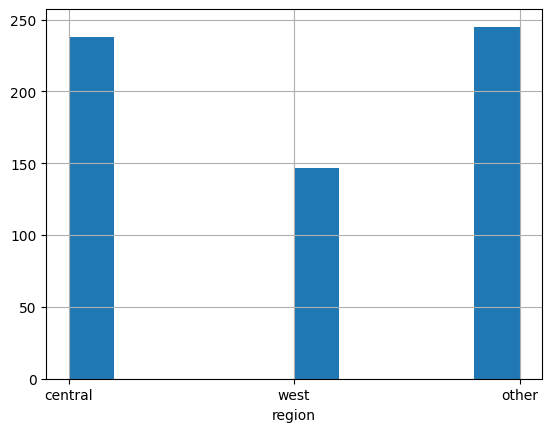

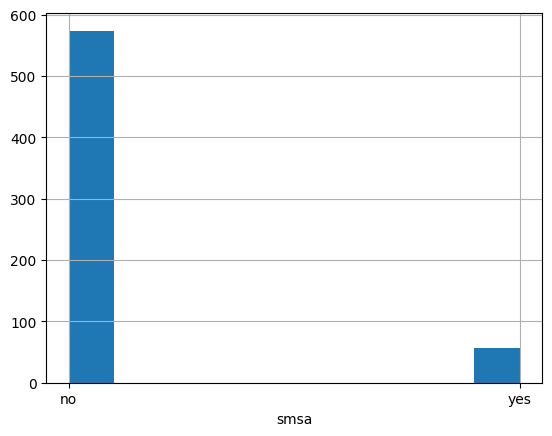

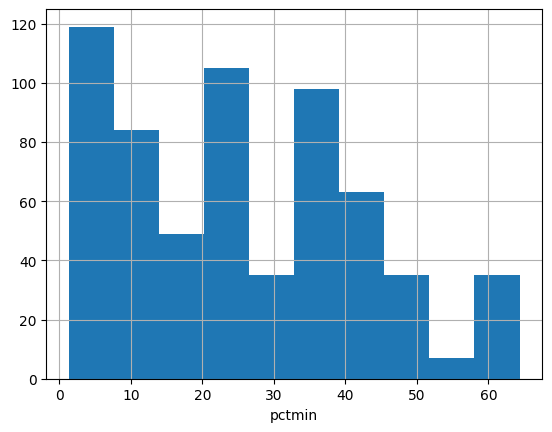

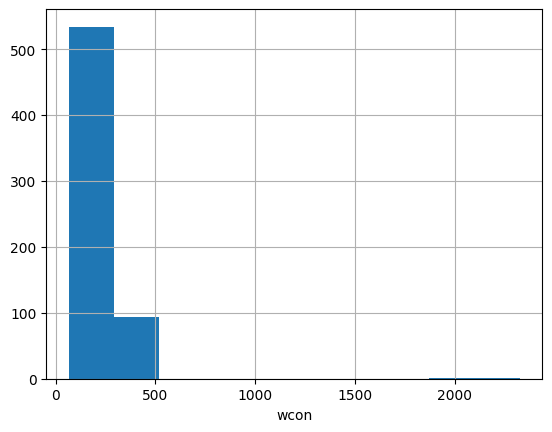

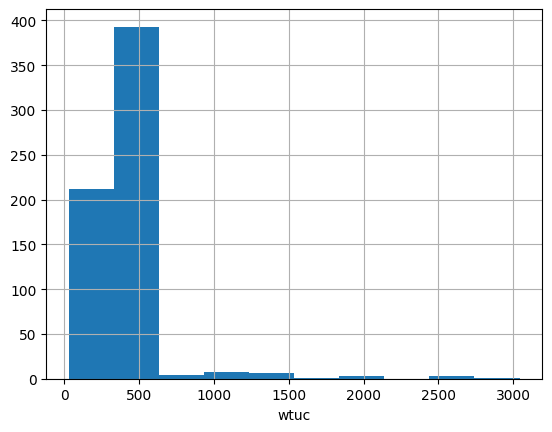

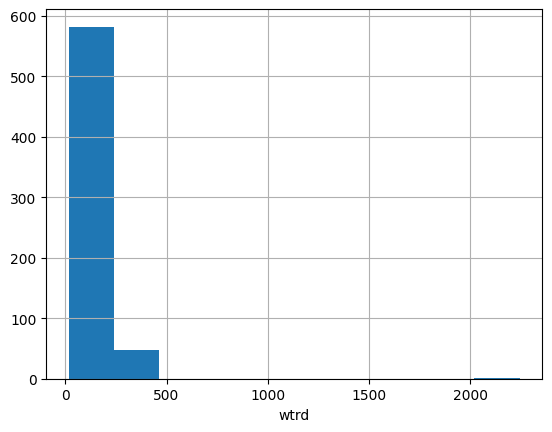

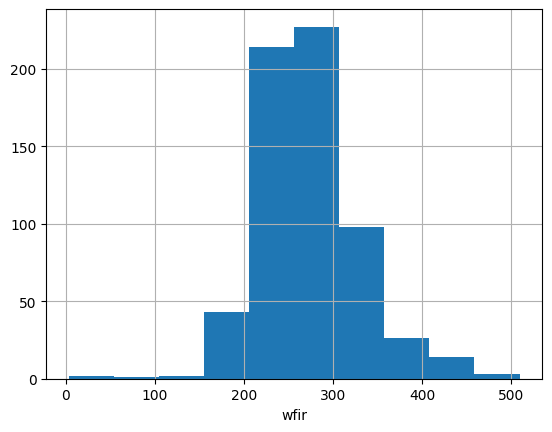

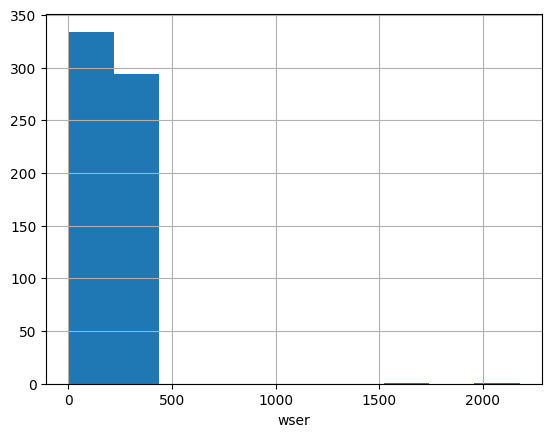

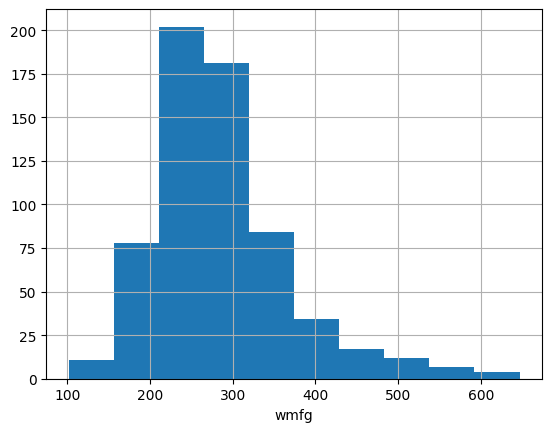

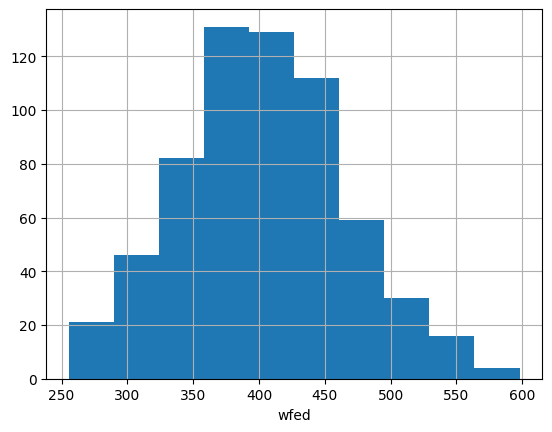

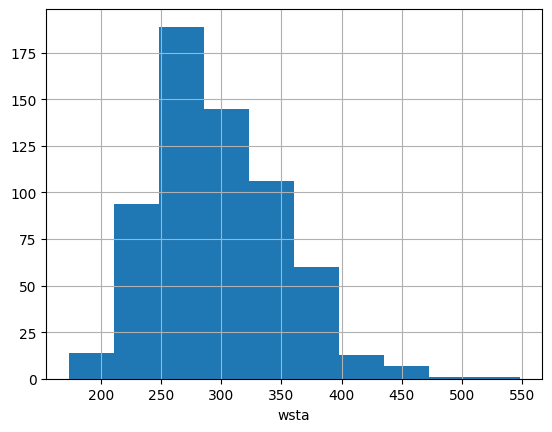

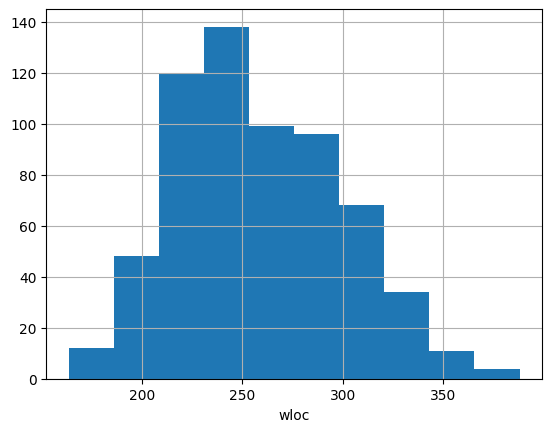

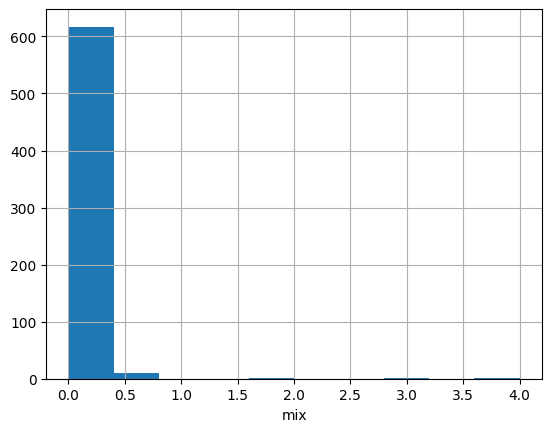

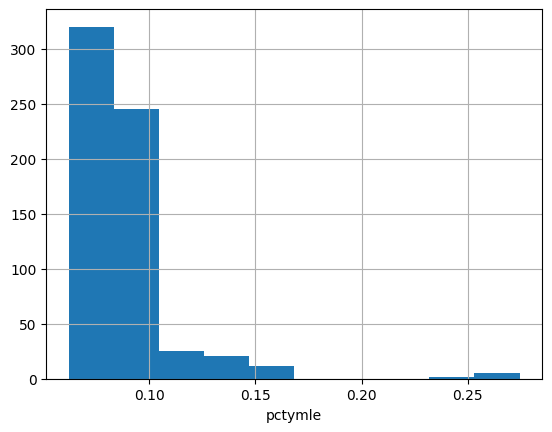

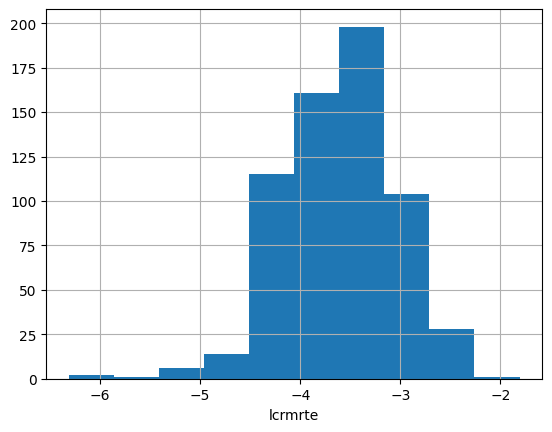

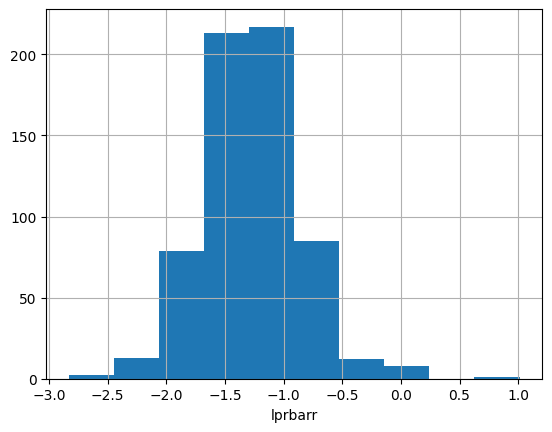

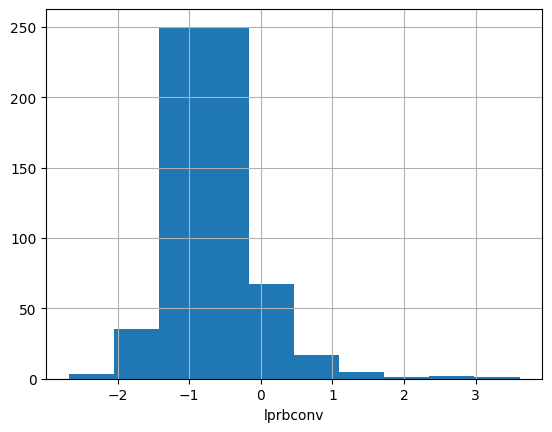

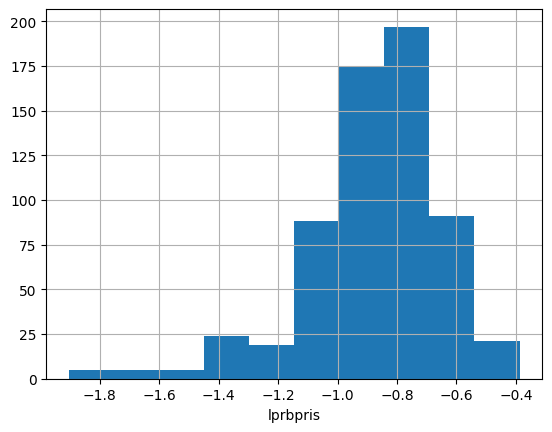

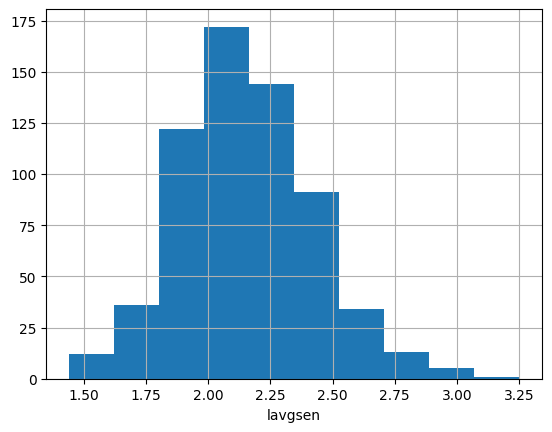

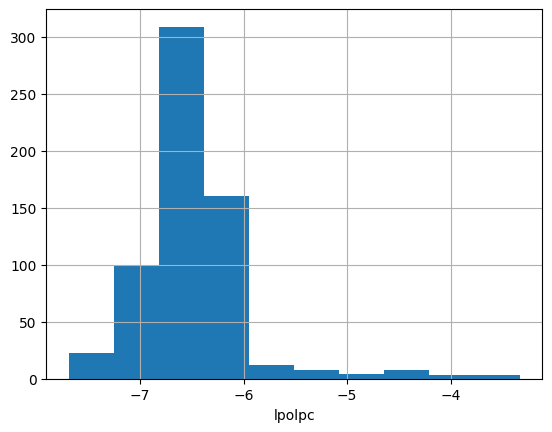

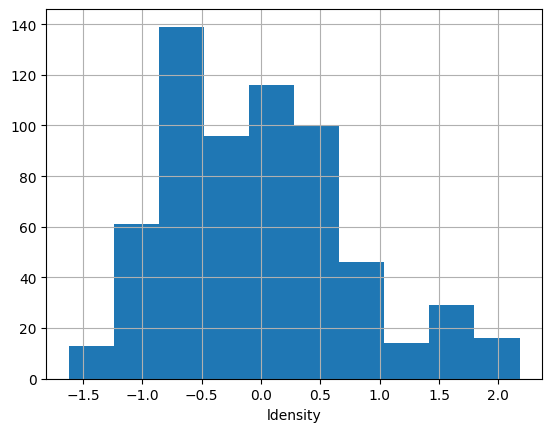

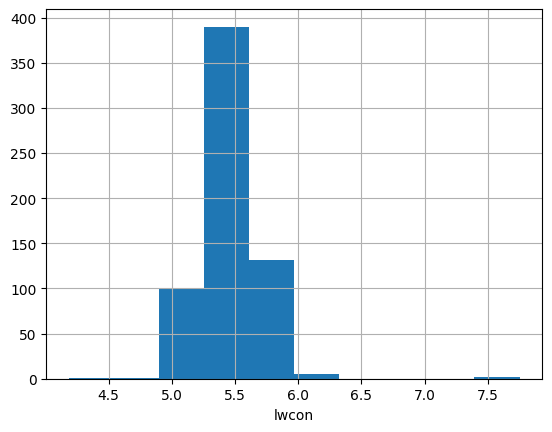

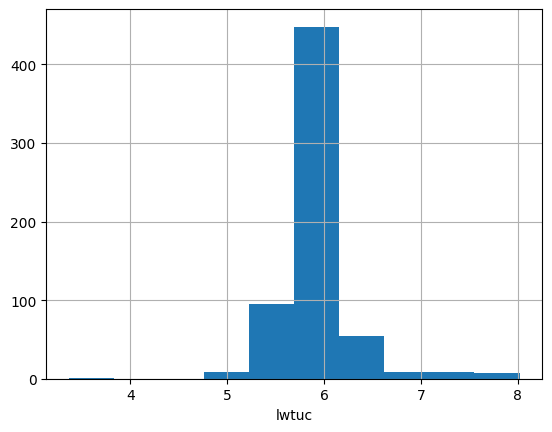

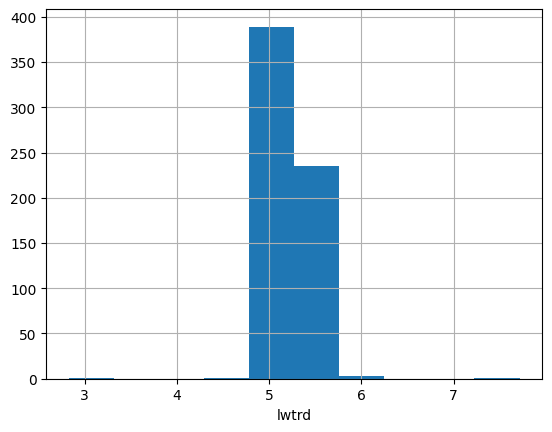

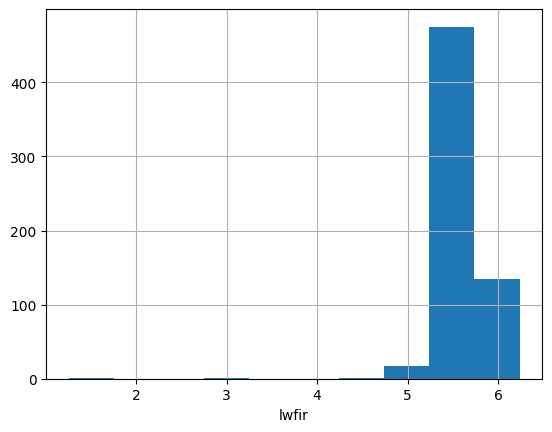

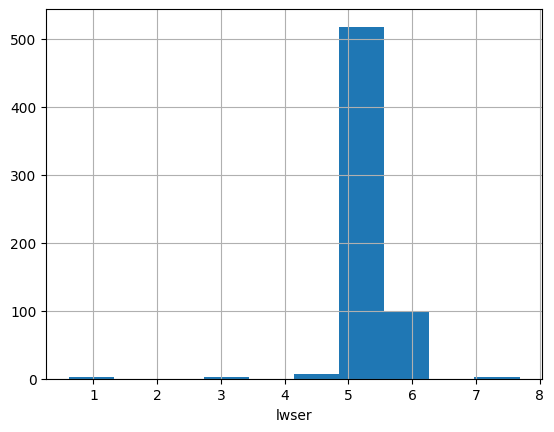

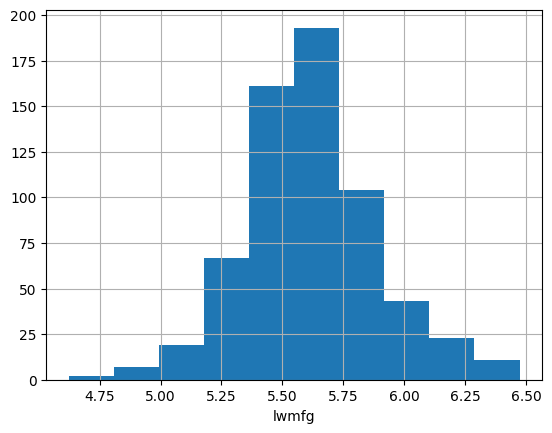

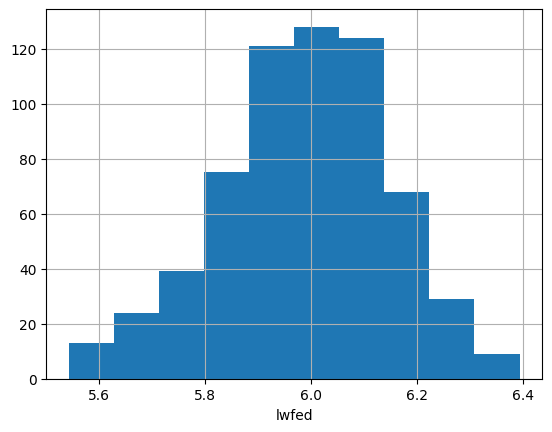

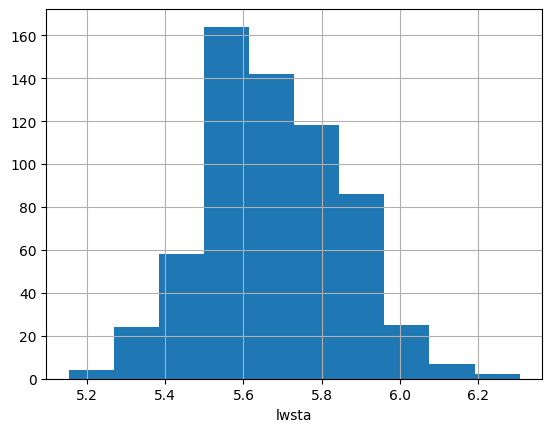

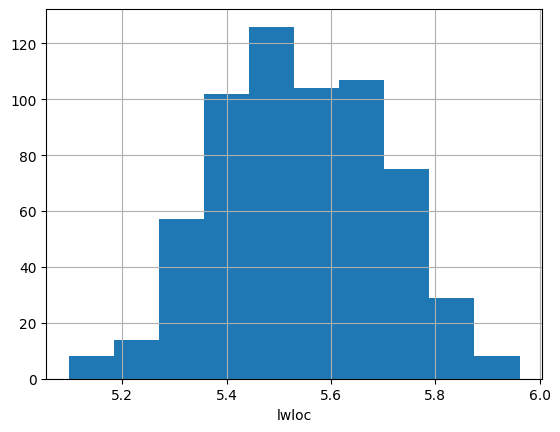

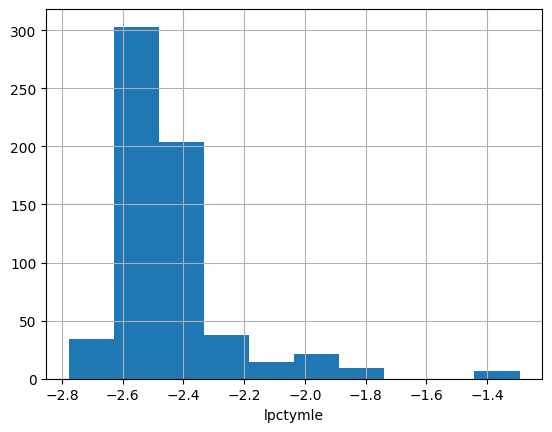

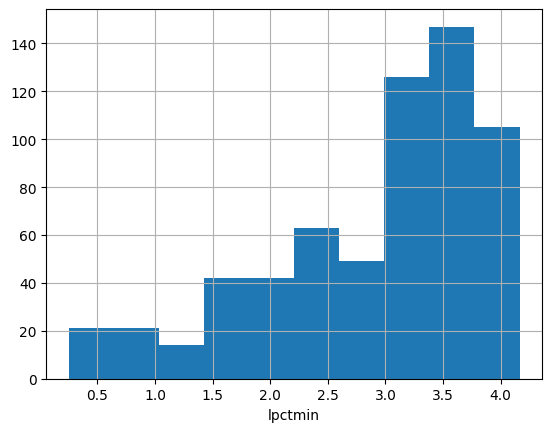

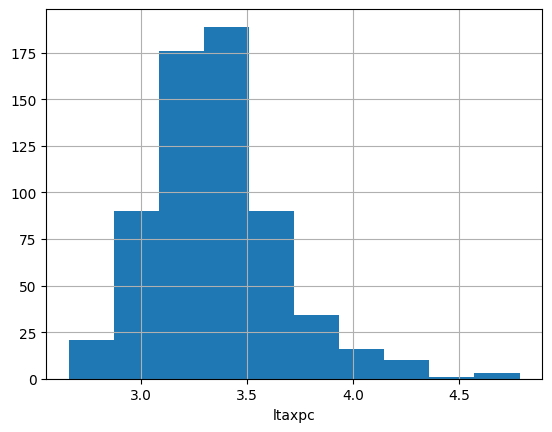

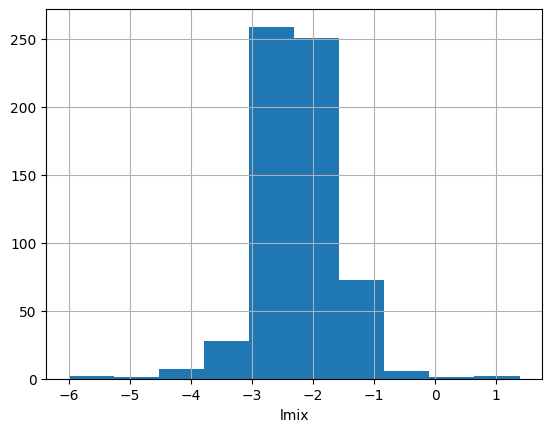

In [28]:
for col in df.columns:
    df[col].hist()
    plt.xlabel(col)
    plt.show()
